# Requirements

In [55]:
import matplotlib.pyplot as plt
# Add as many imports as you need.
# Add as many imports as you need.
import numpy as np
import pandas as pd

# Add as many imports as you need.
# Add as many imports as you need.
from VNP.packages.data_alalysis import *
from VNP.packages.data_preperation import *
from VNP.packages.missing_values import *
from VNP.packages.visualization import *
from VNP.packages.models import *
from VNP.packages.evaluation import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Laboratory Exercise - Run Mode (8 points)

## The Vacation Preferences Dataset
The dataset contains information about individuals and their vacation preferences. It includes details such as age, gender, income, and education level. It also provides insights into their vacation habits, like the number of vacations taken each year, preferred activities (such as hiking, swimming, skiing, or sunbathing), and their budget for vacations. Other information includes the type of place they live in (urban, suburban, or rural), how far they live from mountains and beaches, and their favorite season for vacations (summer, winter, spring, or fall). The dataset also contains information whether they have pets and if they are concerned about the environment. All these features serve as input variables for predictive modeling. The 'Preference' attribute serves as the target variable, where 1 represents preference for mountains, 0 for beaches.

Load the dataset into a `pandas` data frame.

In [4]:
# Write your code here. Add as many boxes as you need.
df = pd.read_csv("./data/vacation_preferences_data.csv")
df  

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56.0,male,71477,bachelor,9,skiing,2477,urban,175.0,267,summer,0,1,1
1,69.0,male,88740,master,1,swimming,4777,suburban,NaN,190,fall,0,1,0
2,46.0,female,46562,master,0,skiing,1469,urban,71.0,280,winter,0,0,1
3,32.0,non-binary,99044,high school,6,hiking,1482,rural,31.0,255,summer,1,0,1
4,60.0,female,106583,high school,5,sunbathing,516,suburban,23.0,151,winter,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52439,67.0,female,85325,master,3,hiking,1762,suburban,51.0,262,fall,1,0,1
52440,37.0,female,110346,bachelor,7,swimming,1676,urban,259.0,84,spring,1,0,0
52441,53.0,non-binary,71080,doctorate,7,swimming,3877,urban,NaN,27,fall,0,1,0
52442,40.0,female,75174,doctorate,9,swimming,4620,suburban,173.0,10,summer,0,1,0


In [5]:
education_level_encoder = OrdinalEncoder()
gender_encoder = OrdinalEncoder()
preferred_activities_encoder = OrdinalEncoder()
location_encoder = OrdinalEncoder()
fav_season_encoder = OrdinalEncoder()

In [6]:
df["Education_Level"] = education_level_encoder.fit_transform(df[["Education_Level"]])
df["Gender"] = gender_encoder.fit_transform(df[["Gender"]])
df["Preferred_Activities"] = preferred_activities_encoder.fit_transform(df[["Preferred_Activities"]])
df["Location"] = location_encoder.fit_transform(df[["Location"]])
df["Favorite_Season"] = fav_season_encoder.fit_transform(df[["Favorite_Season"]])

In [7]:
df

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
0,56.0,1.0,71477,0.0,9,1.0,2477,2.0,175.0,267,2.0,0,1,1
1,69.0,1.0,88740,3.0,1,3.0,4777,1.0,NaN,190,0.0,0,1,0
2,46.0,0.0,46562,3.0,0,1.0,1469,2.0,71.0,280,3.0,0,0,1
3,32.0,2.0,99044,2.0,6,0.0,1482,0.0,31.0,255,2.0,1,0,1
4,60.0,0.0,106583,2.0,5,2.0,516,1.0,23.0,151,3.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52439,67.0,0.0,85325,3.0,3,0.0,1762,1.0,51.0,262,0.0,1,0,1
52440,37.0,0.0,110346,0.0,7,3.0,1676,2.0,259.0,84,1.0,1,0,0
52441,53.0,2.0,71080,1.0,7,3.0,3877,2.0,NaN,27,0.0,0,1,0
52442,40.0,0.0,75174,1.0,9,3.0,4620,1.0,173.0,10,2.0,0,1,0


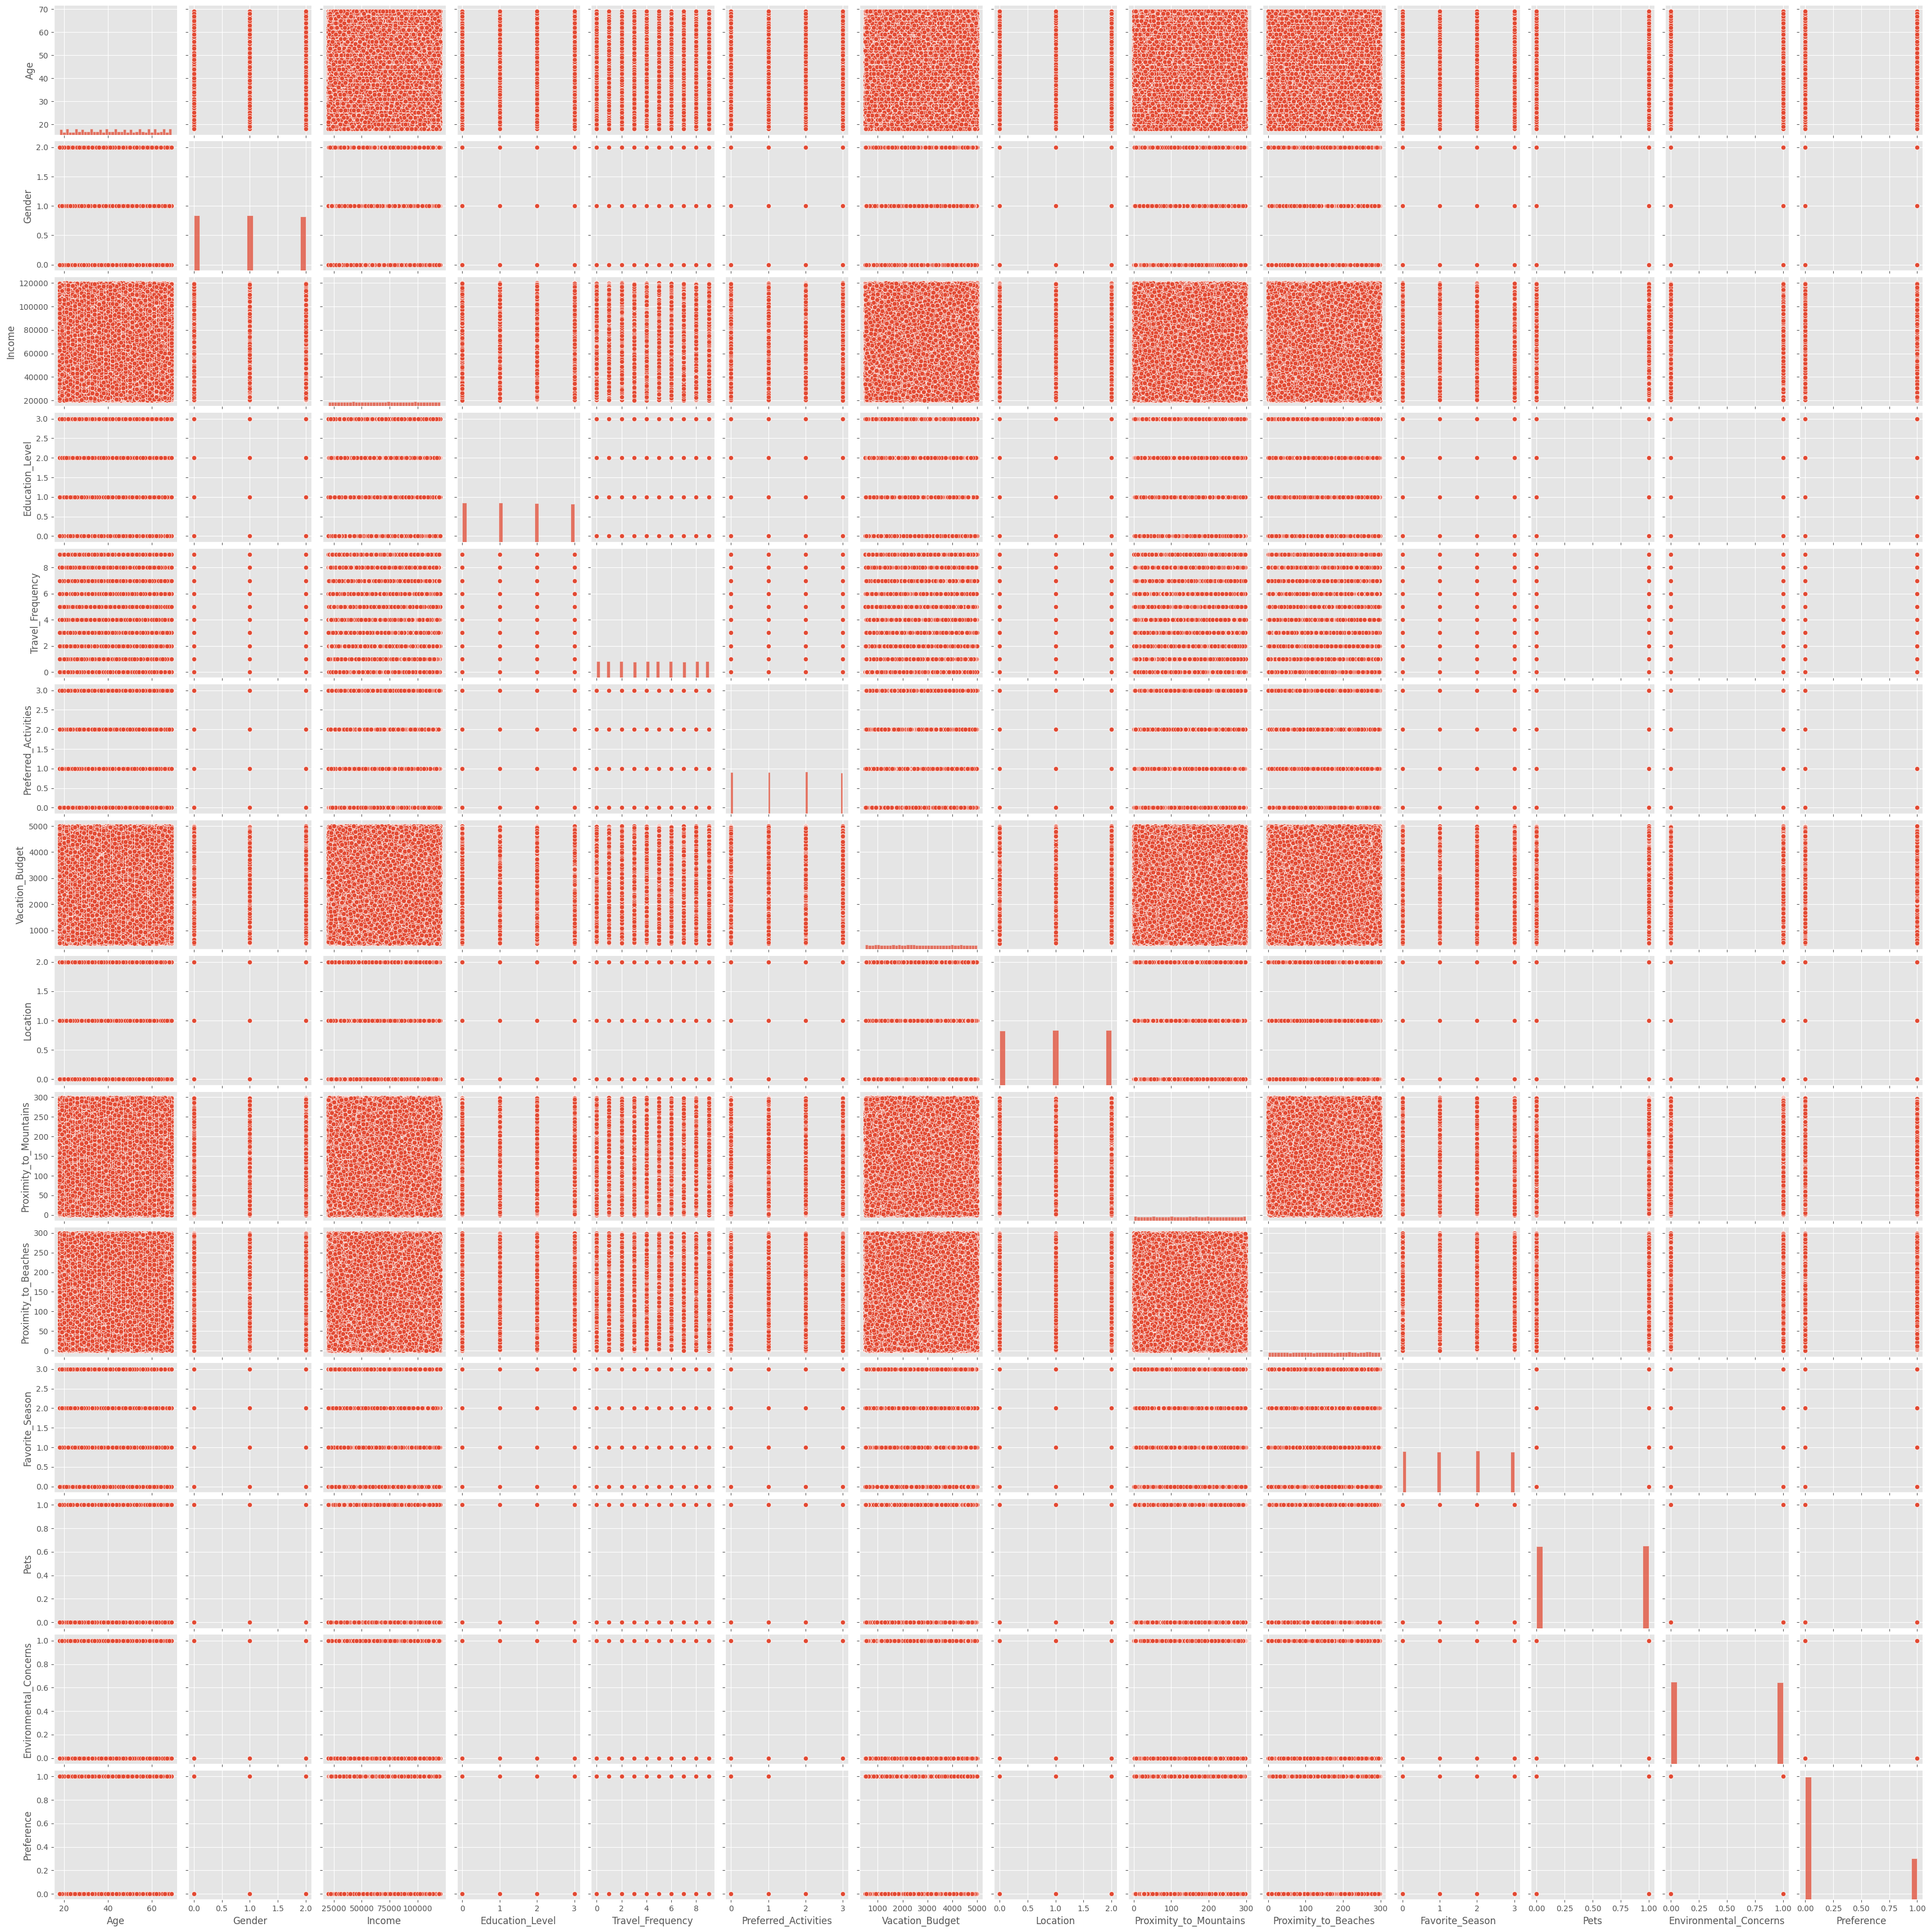

In [8]:
sns.pairplot(df)

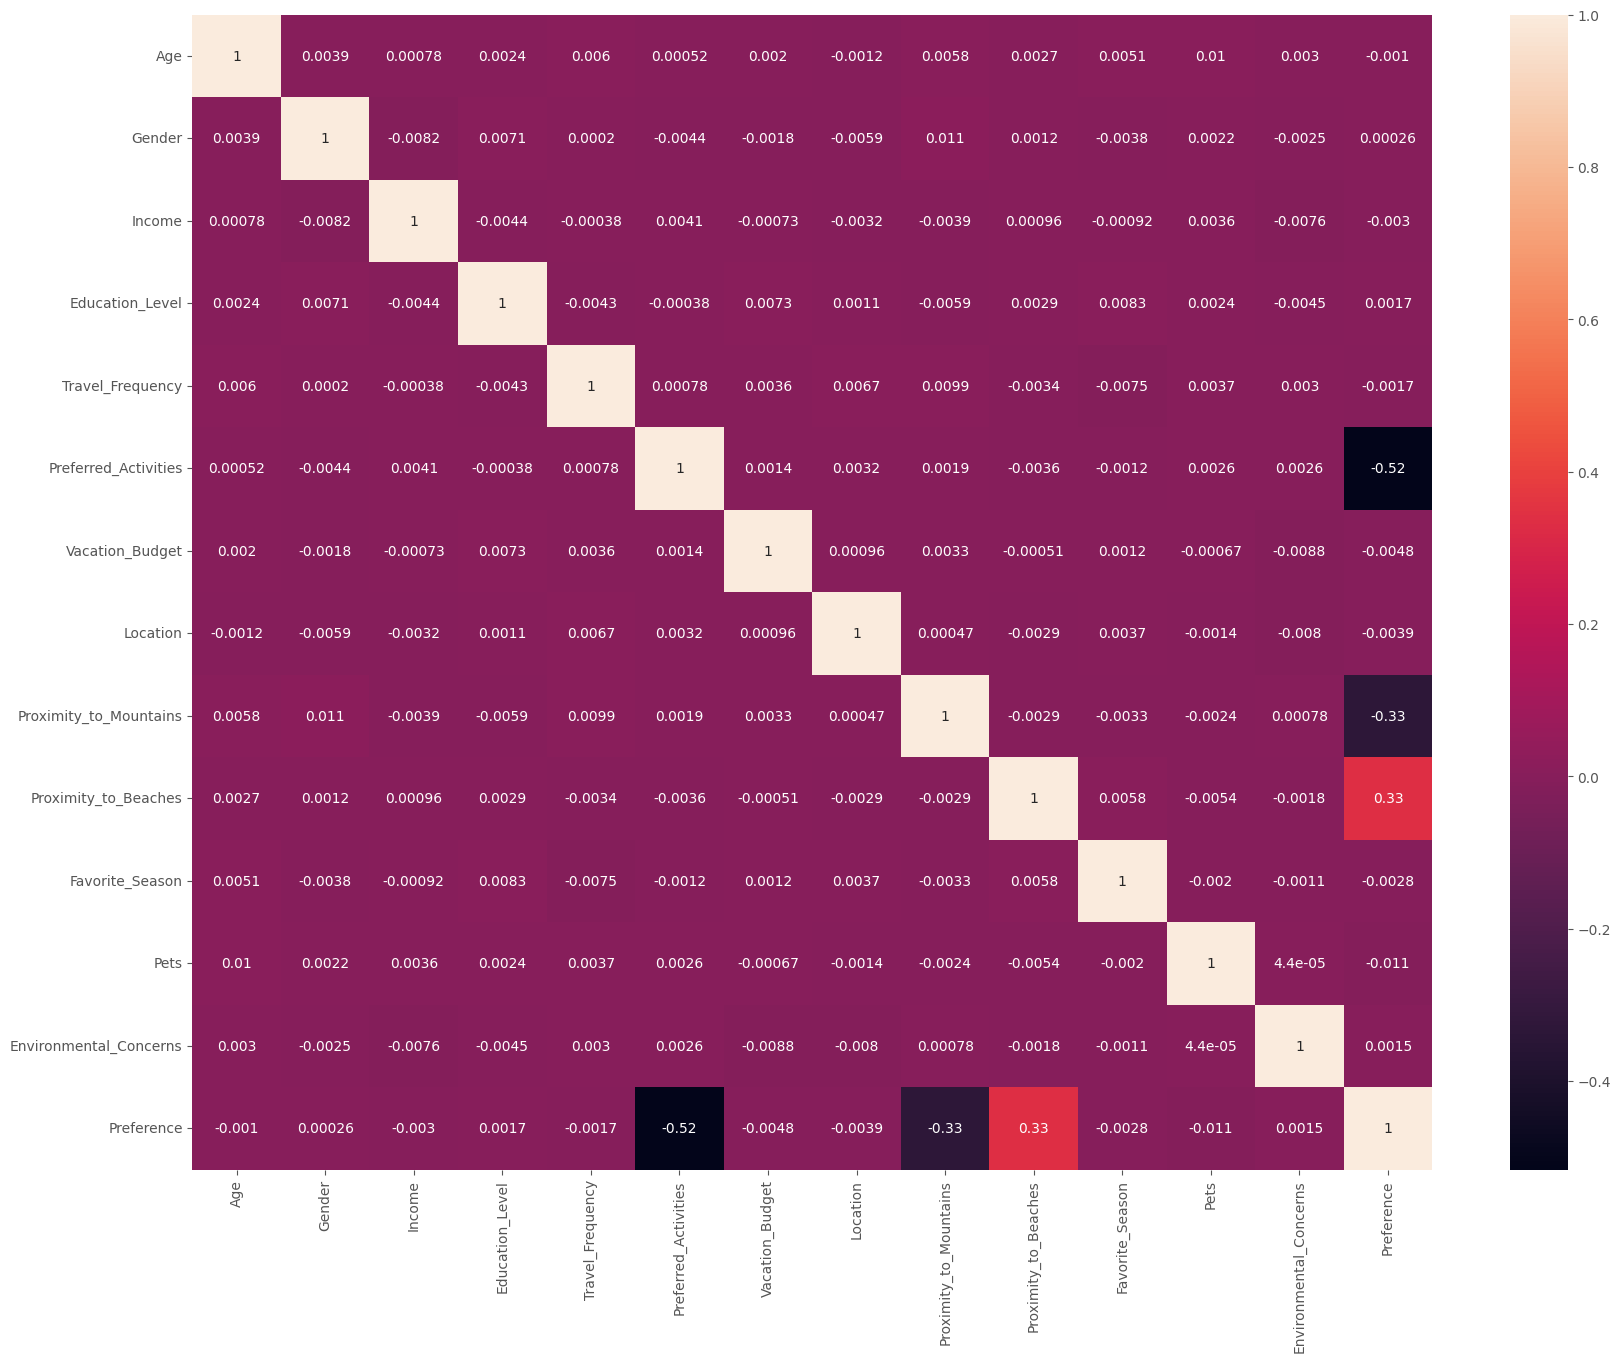

In [9]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot= True)
plt.show()

Preprocess the input and the output variables appropriately.

In [ ]:
# Write your code here. Add as many boxes as you need.

Explore the dataset using visualizations of your choice.

In [ ]:
# Write your code here. Add as many boxes as you need.

Check if the dataset is balanced.

In [11]:
# Write your code here. Add as many boxes as you need.
balance_table(df, target_column="Preference")

,Class,Count,Percentage,Total
0,0,39296,74.929449,52444
1,1,13148,25.070551,52444


## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [12]:
# Write your code here. Add as many boxes as you need.
missing_table(df)

,Feature,CountMissing,PercentageMissing,Total
0,Age,5244,9.999237,52444
1,Gender,0,0.000000,52444
2,Income,0,0.000000,52444
3,Education_Level,2622,4.999619,52444
4,Travel_Frequency,0,0.000000,52444
5,Preferred_Activities,0,0.000000,52444
6,Vacation_Budget,0,0.000000,52444
7,Location,0,0.000000,52444
8,Proximity_to_Mountains,2622,4.999619,52444
9,Proximity_to_Beaches,0,0.000000,52444


<Axes: >

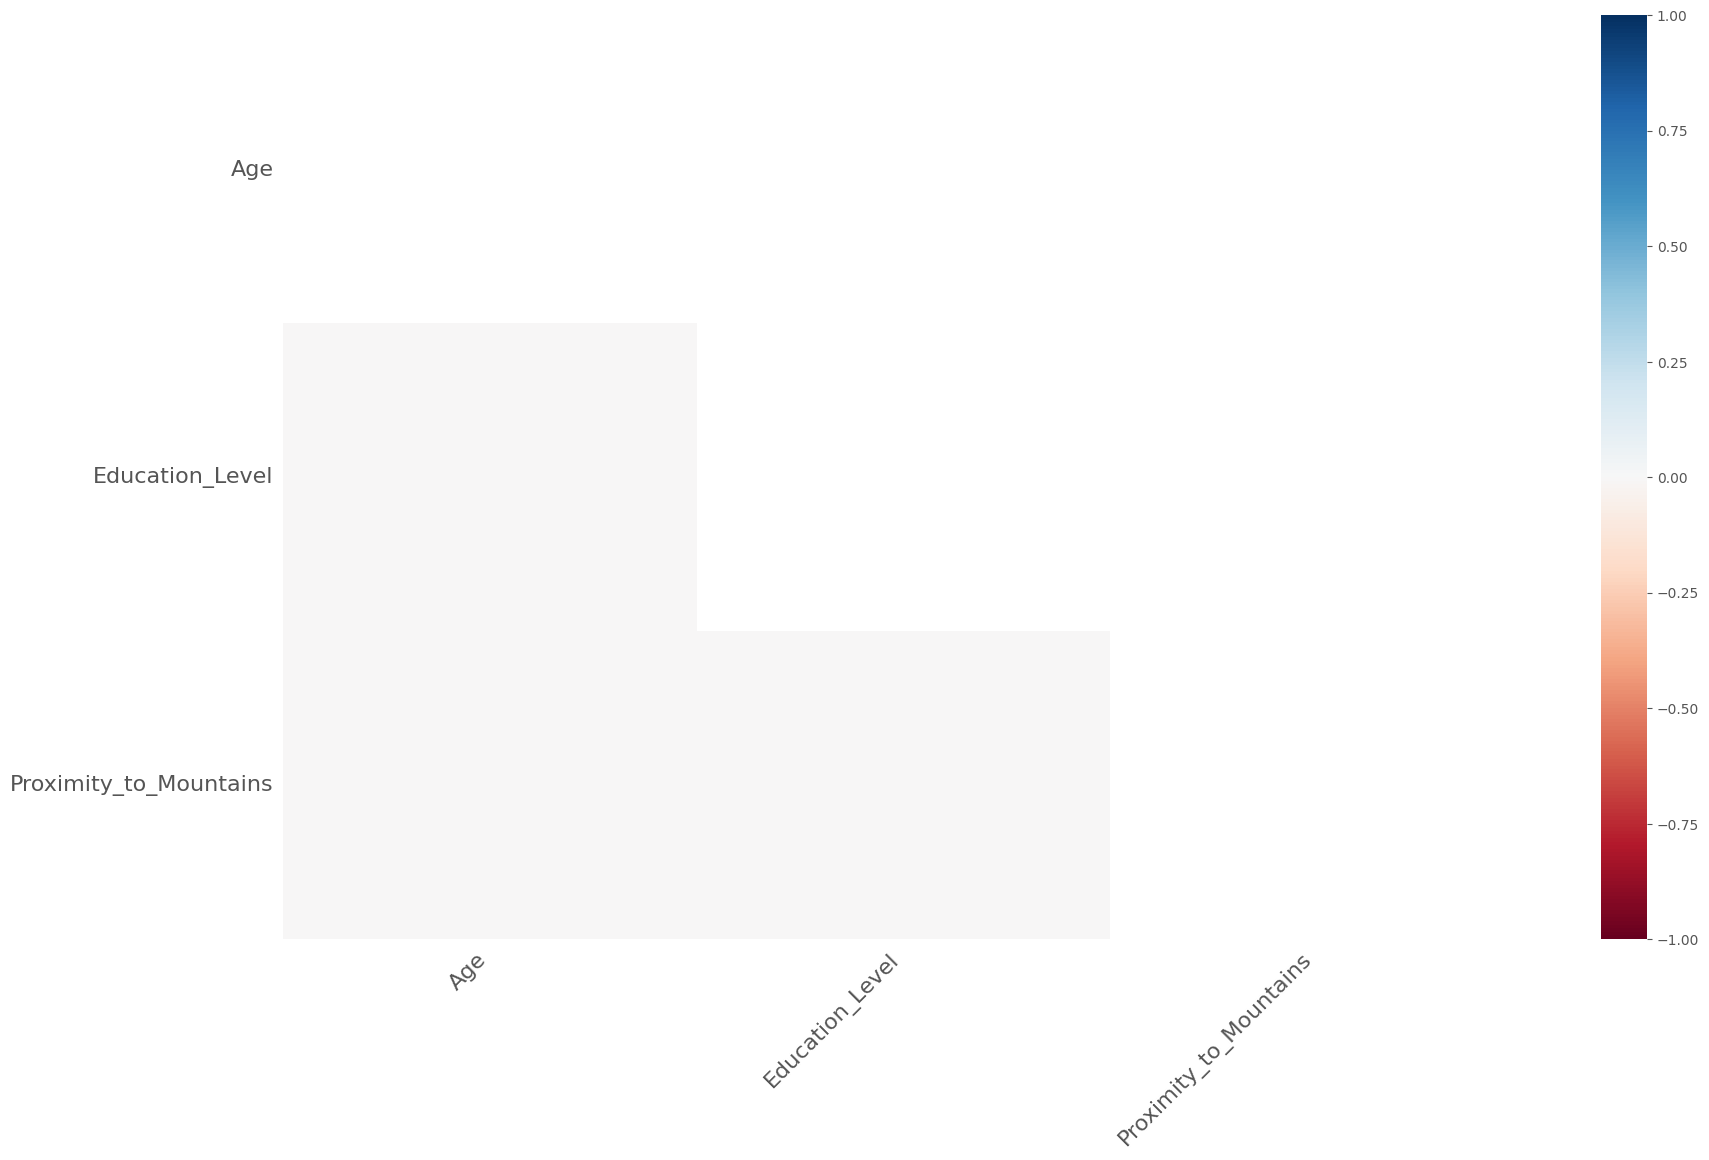

In [13]:
msno.heatmap(df)

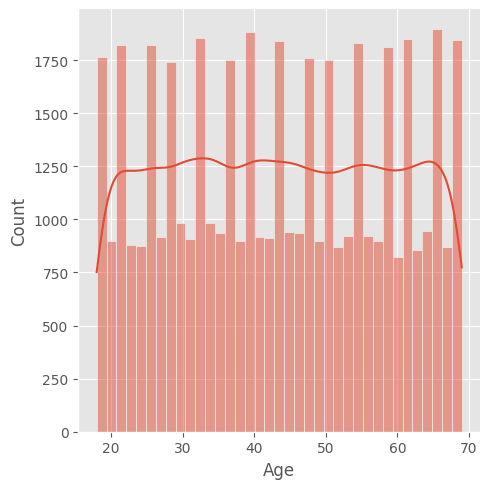

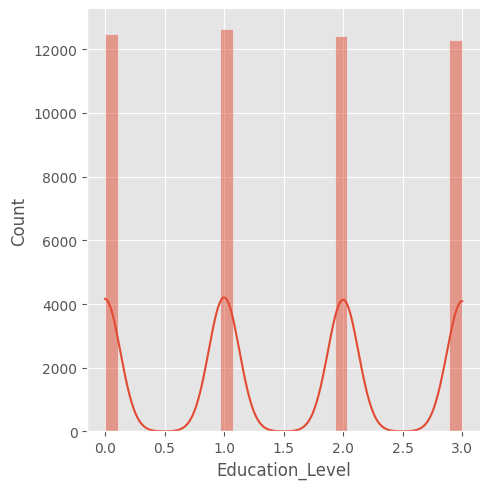

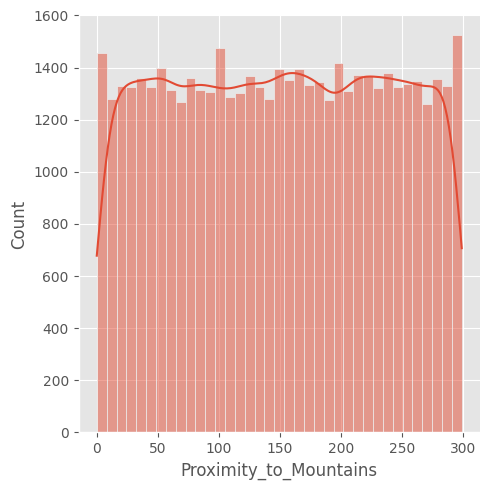

In [16]:
show_displots(df, columns=["Age", "Education_Level", "Proximity_to_Mountains"])

In [17]:
df.columns

Index(['Age', 'Gender', 'Income', 'Education_Level', 'Travel_Frequency',
       'Preferred_Activities', 'Vacation_Budget', 'Location',
       'Proximity_to_Mountains', 'Proximity_to_Beaches', 'Favorite_Season',
       'Pets', 'Environmental_Concerns', 'Preference'],
      dtype='object')

In [18]:
df_copy = correlated_imputer(df, correlated_columns=["Proximity_to_Mountains", "Preference"], strategy="knn")

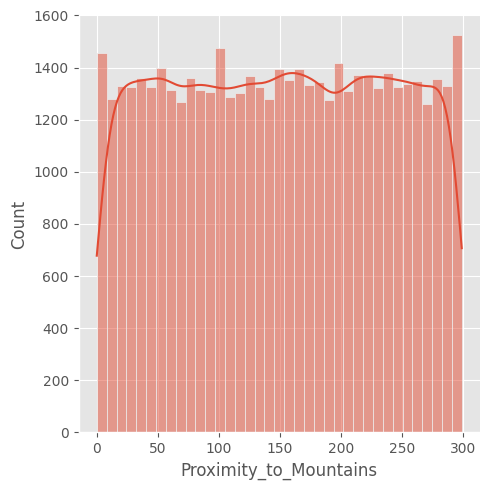

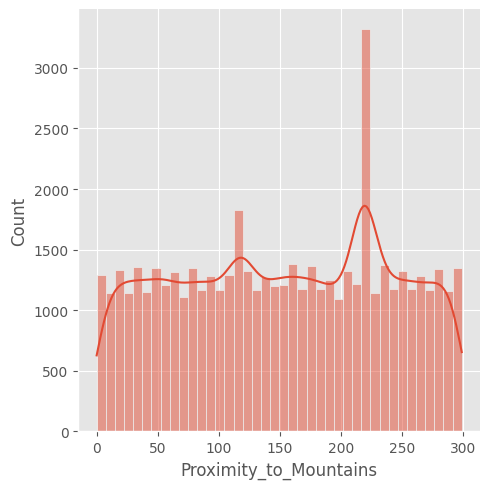

In [19]:
show_displot_before_and_after_inputation(df, df_copy, missing_feature_name="Proximity_to_Mountains")

In [20]:
df_copy1 = uncorrelated_imputer(df_copy, missing_feature="Age", strategy="median")


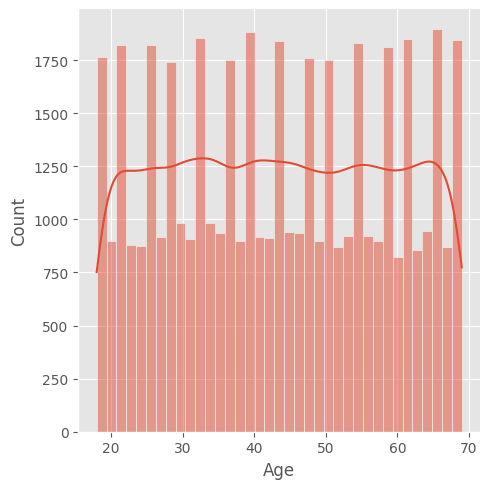

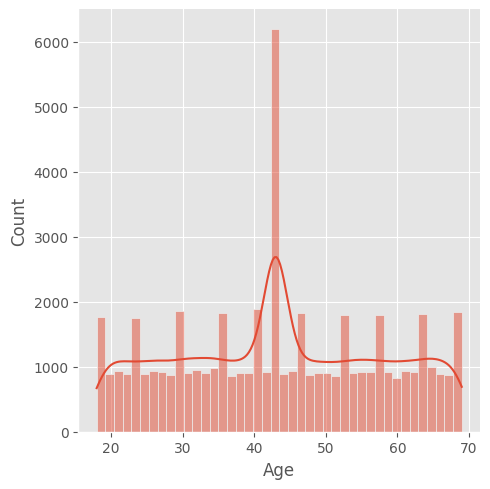

In [21]:
show_displot_before_and_after_inputation(df_copy, df_copy1, missing_feature_name="Age")


In [33]:
missing_table(df_copy1)

,Feature,CountMissing,PercentageMissing,Total
0,Age,0,0.000000,52444
1,Gender,0,0.000000,52444
2,Income,0,0.000000,52444
3,Education_Level,2622,4.999619,52444
4,Travel_Frequency,0,0.000000,52444
5,Preferred_Activities,0,0.000000,52444
6,Vacation_Budget,0,0.000000,52444
7,Location,0,0.000000,52444
8,Proximity_to_Mountains,0,0.000000,52444
9,Proximity_to_Beaches,0,0.000000,52444


In [37]:
df_copy2 = df_copy1.dropna(subset="Education_Level", axis=0)

In [38]:
missing_table(df_copy2)

,Feature,CountMissing,PercentageMissing,Total
0,Age,0,0.0,49822
1,Gender,0,0.0,49822
2,Income,0,0.0,49822
3,Education_Level,0,0.0,49822
4,Travel_Frequency,0,0.0,49822
5,Preferred_Activities,0,0.0,49822
6,Vacation_Budget,0,0.0,49822
7,Location,0,0.0,49822
8,Proximity_to_Mountains,0,0.0,49822
9,Proximity_to_Beaches,0,0.0,49822


## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

In [22]:
# Write your code here. Add as many boxes as you need.

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [23]:
# Write your code here. Add as many boxes as you need.

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [39]:
# Write your code here. Add as many boxes as you need.
Y = df_copy2["Preference"]
X = df_copy2.drop(columns="Preference", axis=1)

In [40]:
X

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns
0,56.0,1.0,71477,0.0,9,1.0,2477,2.0,175.0,267,2.0,0,1
1,69.0,1.0,88740,3.0,1,3.0,4777,1.0,219.4,190,0.0,0,1
2,46.0,0.0,46562,3.0,0,1.0,1469,2.0,71.0,280,3.0,0,0
3,32.0,2.0,99044,2.0,6,0.0,1482,0.0,31.0,255,2.0,1,0
4,60.0,0.0,106583,2.0,5,2.0,516,1.0,23.0,151,3.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52439,67.0,0.0,85325,3.0,3,0.0,1762,1.0,51.0,262,0.0,1,0
52440,37.0,0.0,110346,0.0,7,3.0,1676,2.0,259.0,84,1.0,1,0
52441,53.0,2.0,71080,1.0,7,3.0,3877,2.0,219.4,27,0.0,0,1
52442,40.0,0.0,75174,1.0,9,3.0,4620,1.0,173.0,10,2.0,0,1


In [41]:
Y

0        1.0
1        0.0
2        1.0
3        1.0
4        0.0
        ... 
52439    1.0
52440    0.0
52441    0.0
52442    0.0
52443    0.0
Name: Preference, Length: 49822, dtype: float64

## Feature Scaling
Standardize the features appropriately.

In [44]:
x_train, x_test,y_train,y_test = train_test_split(X,Y,shuffle=True,random_state=0, test_size=0.2)

In [45]:
# Write your code here. Add as many boxes as you need.
standart_scale = StandardScaler()
x_train_scaled = pd.DataFrame(standart_scale.fit_transform(x_train), columns=x_train.columns)

In [46]:
x_test_scaled = pd.DataFrame(standart_scale.transform(x_test), columns=x_train.columns)

## Model Selection

Choose and train an approriate model for the given task.

In [48]:
# Write your code here. Add as many boxes as you need.
xgb_classifier = XGBClassifier()

Use the trained model to make predictions for the test set.

In [49]:
# Write your code here. Add as many boxes as you need.
xgb_classifier.fit(x_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Assess the performance of the model by using different classification metrics.

In [51]:
# Write your code here. Add as many boxes as you need.
predit = xgb_classifier.best_predicts(x_test_scaled)

In [54]:
print(classification_report(y_test,predit))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7530
         1.0       0.99      1.00      1.00      2435

    accuracy                           1.00      9965
   macro avg       1.00      1.00      1.00      9965
weighted avg       1.00      1.00      1.00      9965



# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune at least one hyper-parameter using a cross-validation with grid search. This involves systematically experimenting with various values for the hyper-parameter(s) and evaluating the model's performance using cross-validation. Upon determining the most suitable value(s) for the hyper-parameter(s), evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

In [56]:
xgb_classifier.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [61]:
params_grid = {
    "n_estimators" : [200,300,400],
    "learning_rate": [0.1, 0.01, 0.001],
    "max_depth": [5,8,10]
}

In [62]:
# Write your code here. Add as many boxes as you need.
grid_search_cv = GridSearchCV(XGBClassifier(), param_grid=params_grid, scoring="f1", cv=5)

In [63]:
grid_search_cv.fit(X,Y)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [5, 8, 10],
                         'n_estimators': [200, 300, 400]},
             scoring='f1')

In [67]:
grid_search_cv.best_score_

np.float64(0.9941636978454262)

In [69]:
grid_search_cv.best_params_

{'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300}

## Feature Scaling
Standardize the features appropriately.

In [64]:
# Write your code here. Add as many boxes as you need.
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, Y, test_size=0.1, shuffle=True,random_state=0)

In [65]:
scaler1 = StandardScaler()
x_train1_scaled = pd.DataFrame(scaler1.fit_transform(x_train1), columns=x_train1.columns)

In [66]:
x_test1_scaled = pd.DataFrame(scaler1.transform(x_test1), columns=x_train1.columns)


In [74]:
best_xgb_classifier = XGBClassifier(learning_rate=0.1, max_depth=10, n_estimators=100)

In [75]:
best_xgb_classifier.fit(x_train1_scaled,y_train1)   

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [77]:
best_predicts = best_xgb_classifier.predict(x_test1_scaled)

In [79]:
print(classification_report(y_test1, best_predicts))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3816
         1.0       0.99      0.99      0.99      1167

    accuracy                           1.00      4983
   macro avg       1.00      1.00      1.00      4983
weighted avg       1.00      1.00      1.00      4983



## Fine-tuning the Hyperparameters
Experiment with various values for the chosen hyperparameter(s) and evaluate the model's performance using cross-validation.

In [31]:
# Write your code here. Add as many boxes as you need.

## Final Assessment of the Model Performance
Upon determining the most suitable hyperparameter(s), evaluate the model's performance on a test set for final assessment.

In [32]:
# Write your code here. Add as many boxes as you need.